# Data Reading

## Reading Customer data from JSON file

In [14]:
import json

def read_customer_data(file_path):
    
    try:
        with open(file_path, 'r') as f:
            customer_data = json.load(f)
            return customer_data
    except FileNotFoundError:
        print(f"The file {file_path} does not exist.")
    except json.JSONDecodeError:
        print(f"Error decoding JSON from {file_path}.")

# Example usage
customer_data = read_customer_data('customers.json')
print(customer_data[:5])


[{'customer_id': 9780, 'customer_name': 'Jessica Hart', 'country': 'Martinique', 'city': 'South William'}, {'customer_id': 9169, 'customer_name': 'Amy Clark', 'country': 'Kazakhstan', 'city': 'Davisville'}, {'customer_id': 6631, 'customer_name': 'Danielle Elliott', 'country': 'Armenia', 'city': 'East Danny'}, {'customer_id': 8772, 'customer_name': 'Robin Mendoza', 'country': 'Uganda', 'city': 'Johnsonbury'}, {'customer_id': 8913, 'customer_name': 'Abigail Miller', 'country': 'Namibia', 'city': 'Wrightchester'}]


## Reading Transaction data from JSON file

In [20]:
import json

def read_transaction_logs(file_path):
    try:
        with open(file_path, 'r') as f:
            transaction_logs = json.load(f)
            return transaction_logs
    except FileNotFoundError:
        print(f"The file {file_path} does not exist.")
    except json.JSONDecodeError:
        print(f"Error decoding JSON from {file_path}.")

# Example usage
transaction_logs = read_transaction_logs('transaction_logs.json')
print(transaction_logs[:5])


[{'order_id': 1, 'customer_id': 1731, 'product_id': 8609, 'product_name': 'Central home & kitche', 'product_category': 'Home & Kitchen', 'payment_type': 'Wallet', 'qty': 25, 'price': 64216, 'datetime': '2021-07-26T20:16:14', 'ecommerce_website_name': 'www.bestbuy.com', 'payment_txn_id': 'a395e8c7', 'payment_txn_success': 'N', 'failure_reason': 'Card Expired'}, {'order_id': 2, 'customer_id': 5539, 'product_id': 2409, 'product_name': 'Upon sport', 'product_category': 'Sports', 'payment_type': 'Card', 'qty': 34, 'price': 69877, 'datetime': '2021-08-25T03:41:32', 'ecommerce_website_name': 'www.flipkart.com', 'payment_txn_id': 'b40791f8', 'payment_txn_success': 'N', 'failure_reason': 'Invalid CVV'}, {'order_id': 3, 'customer_id': 3507, 'product_id': 1145, 'product_name': 'Across stationer', 'product_category': 'Stationery', 'payment_type': 'Card', 'qty': 28, 'price': 35491, 'datetime': '2024-06-21T21:39:21', 'ecommerce_website_name': 'www.target.com', 'payment_txn_id': '7fb6cca9', 'payment_

# Exploratory Data Analysis (EDA)

## Load and Inspect the Data

In [50]:
import pandas as pd
import json

# Load the JSON data into Pandas DataFrames
def load_json_to_df(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return pd.DataFrame(data)

# Load customer data and transaction data
customer_df = load_json_to_df('customers.json')
transaction_df = load_json_to_df('transaction_logs.json')

# Inspect the first few rows
print(customer_df.head())
print(transaction_df.head())

# Check the structure of the dataset
print(customer_df.info())
print(transaction_df.info())


   customer_id     customer_name     country           city
0         9780      Jessica Hart  Martinique  South William
1         9169         Amy Clark  Kazakhstan     Davisville
2         6631  Danielle Elliott     Armenia     East Danny
3         8772     Robin Mendoza      Uganda    Johnsonbury
4         8913    Abigail Miller     Namibia  Wrightchester
   order_id  customer_id  product_id           product_name product_category  \
0         1         1731        8609  Central home & kitche   Home & Kitchen   
1         2         5539        2409             Upon sport           Sports   
2         3         3507        1145       Across stationer       Stationery   
3         4         4826        8375    Start home & kitche   Home & Kitchen   
4         5         6538        2149             Draw beaut           Beauty   

  payment_type  qty  price             datetime ecommerce_website_name  \
0       Wallet   25  64216  2021-07-26T20:16:14        www.bestbuy.com   
1         C

##  Descriptive Statistics

In [51]:
# Descriptive statistics for numerical columns
print(customer_df.describe())
print(transaction_df.describe())

# Summary statistics for categorical columns
print(customer_df.describe(include=['O']))
print(transaction_df.describe(include=['O']))


       customer_id
count  1000.000000
mean   5053.297000
std    2792.627256
min     102.000000
25%    2662.000000
50%    5156.000000
75%    7395.000000
max    9991.000000
          order_id   customer_id   product_id           qty         price
count  10000.00000  10000.000000  10000.00000  10000.000000  10000.000000
mean    5000.50000   5540.854400   5153.96520     25.524800  49682.003700
std     2886.89568   2776.686488   2828.45628     14.456946  28860.567215
min        1.00000    109.000000    201.00000      1.000000     10.000000
25%     2500.75000   3141.500000   2709.75000     13.000000  24704.750000
50%     5000.50000   5989.000000   5195.00000     26.000000  49245.500000
75%     7500.25000   8341.500000   7599.00000     38.000000  74755.000000
max    10000.00000   9991.000000   9996.00000     50.000000  99989.000000
         customer_name   country       city
count             1000      1000       1000
unique             997       238        950
top     David Williams  Djibout

## Relationships and Patterns

Transaction Frequency by Customer:
 customer_id
109      1
144     23
145      2
147      2
158     18
        ..
9936     4
9937    14
9961    13
9981     3
9991    23
Length: 671, dtype: int64
Total Spend by Customer:
 customer_id
109        52157
144     40165764
145      5164962
147      4319048
158     20344458
          ...   
9936     7009367
9937    20530442
9961    18236661
9981     6755696
9991    24408357
Name: total_spent, Length: 671, dtype: int64
Transactions by Country:
 country
Myanmar                        1433
Ghana                           623
Angola                          309
Austria                         245
Ireland                         170
                               ... 
Ethiopia                          1
China                             1
Falkland Islands (Malvinas)       1
Palestinian Territory             1
Saint Helena                      1
Name: count, Length: 222, dtype: int64
Most Popular Products:
 product_name
Phone clothin           226
W

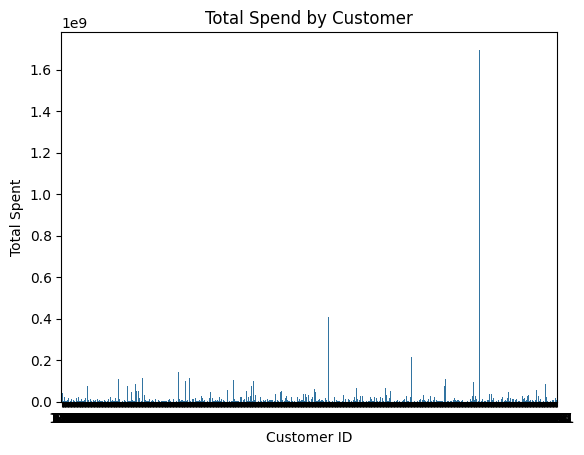

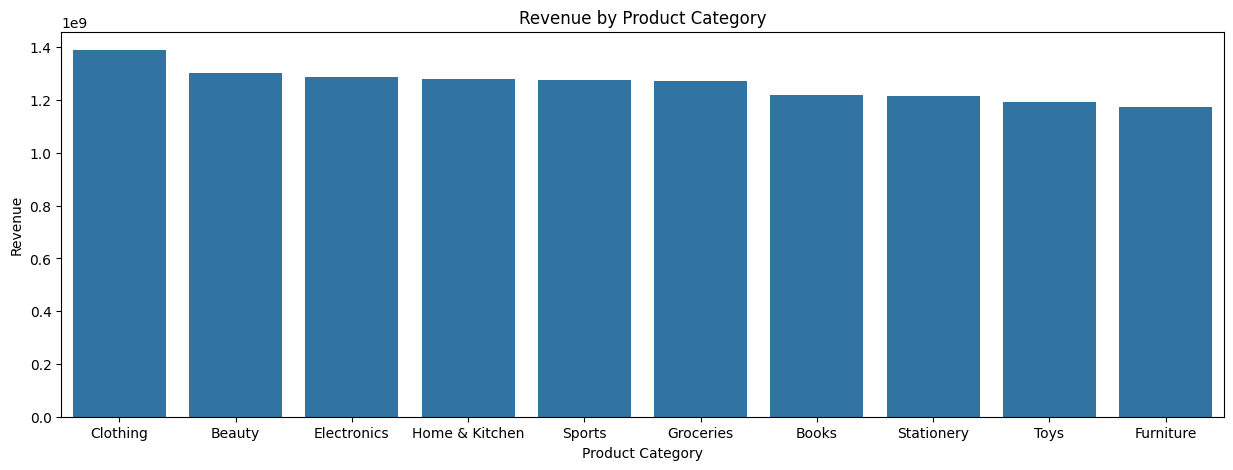

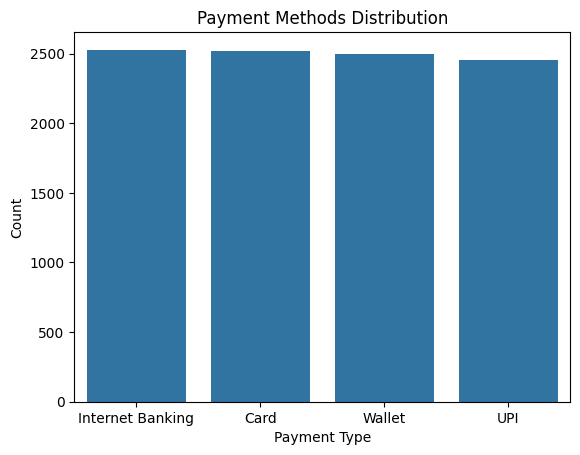

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load or create DataFrames
customer_df = pd.read_json('customers.json')
transaction_df = pd.read_json('transaction_logs.json')


# Merge dataframes on customer_id
merged_df = pd.merge(transaction_df, customer_df, on='customer_id')

# a. Transaction Frequency by Customer
transaction_freq = merged_df.groupby('customer_id').size()
print("Transaction Frequency by Customer:\n", transaction_freq)

# b. Total Spend by Customer
merged_df['total_spent'] = merged_df['price'] * merged_df['qty']
total_spent_by_customer = merged_df.groupby('customer_id')['total_spent'].sum()
print("Total Spend by Customer:\n", total_spent_by_customer)

# c. Geographic Patterns
transactions_by_country = merged_df['country'].value_counts()
print("Transactions by Country:\n", transactions_by_country)

# d. Most Popular Products
most_popular_products = merged_df.groupby('product_name')['qty'].sum().sort_values(ascending=False)
print("Most Popular Products:\n", most_popular_products)

# e. Revenue by Product Category
revenue_by_category = merged_df.groupby('product_category')['total_spent'].sum().sort_values(ascending=False)
print("Revenue by Product Category:\n", revenue_by_category)

# f. Payment Success Rate
payment_success_rate = merged_df['payment_txn_success'].value_counts(normalize=True) * 100
print("Payment Success Rate:\n", payment_success_rate)

# g. Payment Methods Distribution
payment_type_distribution = merged_df['payment_type'].value_counts()
print("Payment Methods Distribution:\n", payment_type_distribution)

# Visualizations
# Total Spend by Customer
sns.barplot(x=total_spent_by_customer.index, y=total_spent_by_customer.values)
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.title('Total Spend by Customer')
plt.show()

# Revenue by Product Category
fig = plt.figure(figsize = (15, 5))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values)
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue by Product Category')
plt.show()

# Payment Methods Distribution
sns.barplot(x=payment_type_distribution.index, y=payment_type_distribution.values)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment Methods Distribution')
plt.show()


## Data Visualization

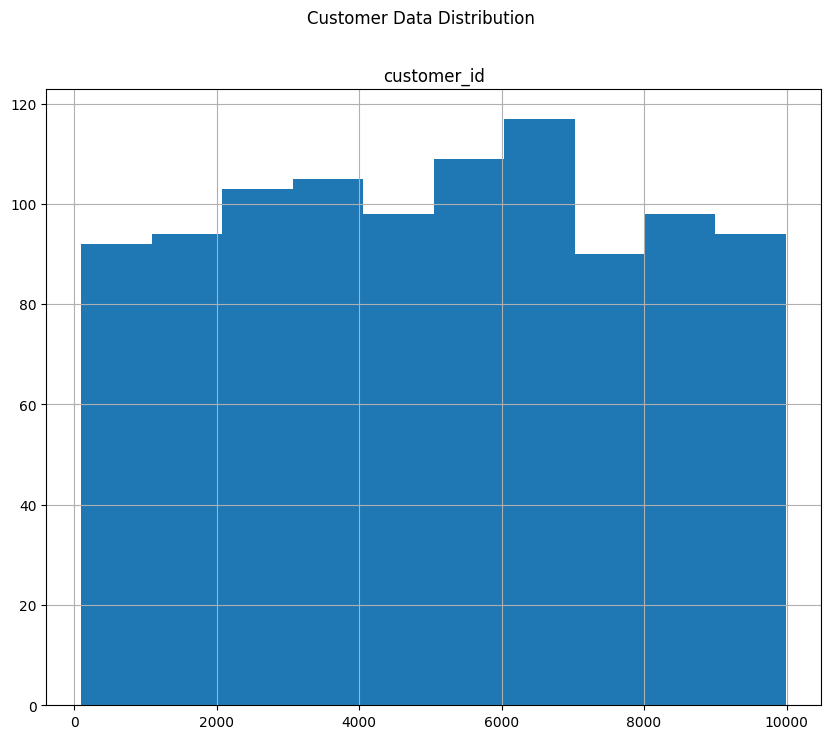

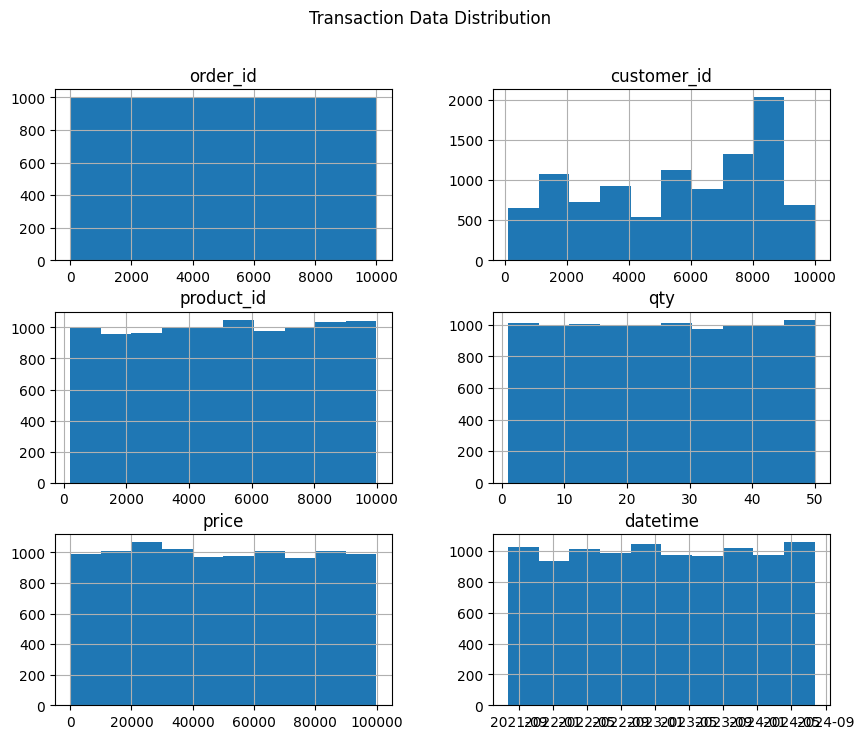

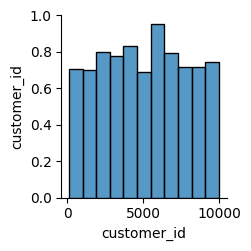

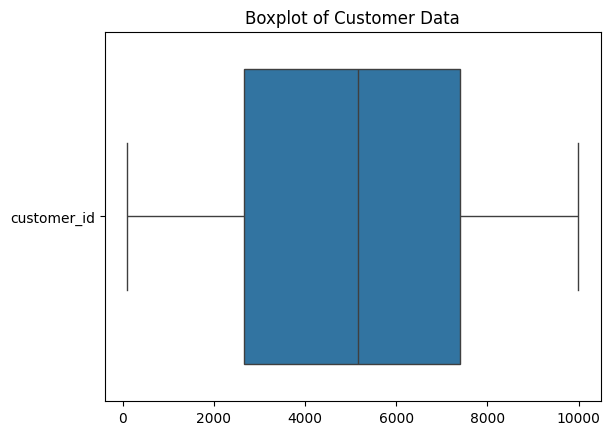

In [64]:
# Histograms for numerical features
customer_df.hist(figsize=(10, 8))
plt.suptitle('Customer Data Distribution')
plt.show()

transaction_df.hist(figsize=(10, 8))
plt.suptitle('Transaction Data Distribution')
plt.show()

# Pairplot to see pairwise relationships
sns.pairplot(customer_df)
plt.show()

# Boxplots to identify potential outliers
sns.boxplot(data=customer_df, orient='h')
plt.title('Boxplot of Customer Data')
plt.show()


## Missing Values Detection

customer_id      0
customer_name    0
country          0
city             0
dtype: int64
order_id                  0
customer_id               0
product_id                0
product_name              0
product_category          0
payment_type              0
qty                       0
price                     0
datetime                  0
ecommerce_website_name    0
payment_txn_id            0
payment_txn_success       0
failure_reason            0
dtype: int64


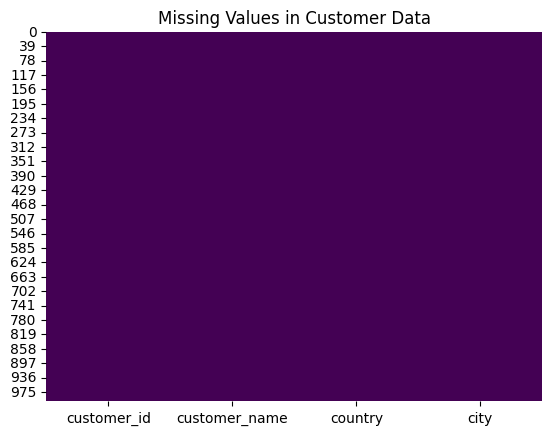

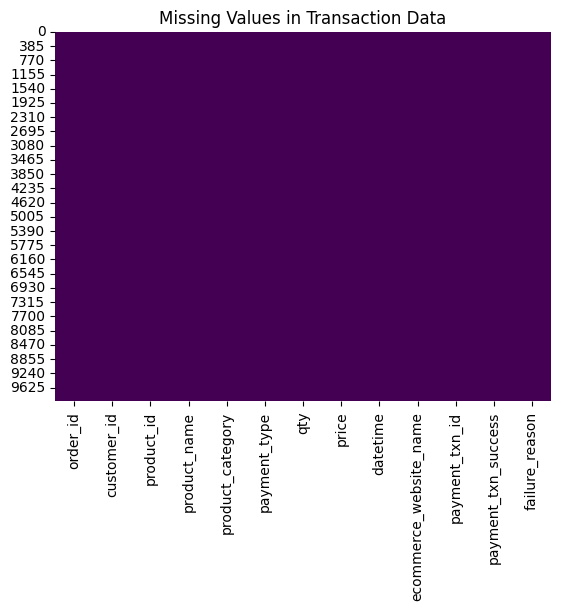

In [52]:
# Check for missing values
print(customer_df.isnull().sum())
print(transaction_df.isnull().sum())

# Optionally, visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(customer_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Customer Data')
plt.show()

sns.heatmap(transaction_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Transaction Data')
plt.show()


 ## Outlier Detection

Empty DataFrame
Columns: [customer_id, customer_name, country, city]
Index: []


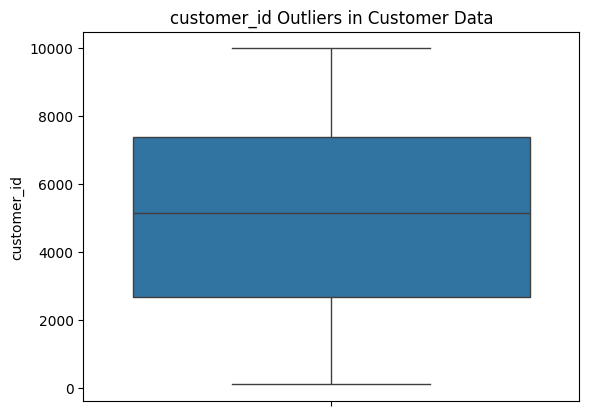

In [54]:
# Example: Detecting outliers using IQR for a numerical column
Q1 = customer_df['customer_id'].quantile(0.25)
Q3 = customer_df['customer_id'].quantile(0.75)
IQR = Q3 - Q1

outliers = customer_df[(customer_df['customer_id'] < (Q1 - 1.5 * IQR)) | (customer_df['customer_id'] > (Q3 + 1.5 * IQR))]
print(outliers)

# Alternatively, visualize with a boxplot
sns.boxplot(customer_df['customer_id'])
plt.title('customer_id Outliers in Customer Data')
plt.show()


Empty DataFrame
Columns: [order_id, customer_id, product_id, product_name, product_category, payment_type, qty, price, datetime, ecommerce_website_name, payment_txn_id, payment_txn_success, failure_reason]
Index: []


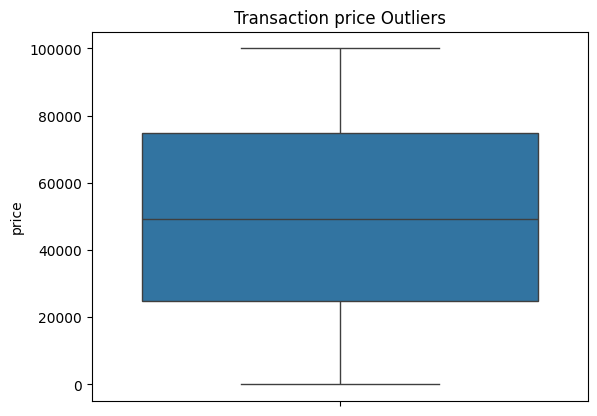

In [55]:
# Detecting outliers using IQR for a numerical column
Q1 = transaction_df['price'].quantile(0.25)
Q3 = transaction_df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = transaction_df[(transaction_df['price'] < (Q1 - 1.5 * IQR)) | (transaction_df['price'] > (Q3 + 1.5 * IQR))]
print(outliers)

# Visualize outliers using a boxplot
sns.boxplot(transaction_df['price'])
plt.title('Transaction price Outliers')
plt.show()


## Anomaly Detection

Outliers in Quantity:
 Empty DataFrame
Columns: [order_id, customer_id, product_id, product_name, product_category, payment_type, qty, price, datetime, ecommerce_website_name, payment_txn_id, payment_txn_success, failure_reason]
Index: []
Outliers in Price:
 Empty DataFrame
Columns: [order_id, customer_id, product_id, product_name, product_category, payment_type, qty, price, datetime, ecommerce_website_name, payment_txn_id, payment_txn_success, failure_reason]
Index: []
Outliers in Country:
      customer_id        customer_name                            country  \
69          1891  Mrs. Melinda Garcia                     Cayman Islands   
106         2272        Brenda Snyder                             Zambia   
175         1557        Amanda Wilson  Heard Island and McDonald Islands   
176         5487           Emily Case                            Ecuador   
179         3048        Joshua Garcia                              Chile   
194         7412        Matthew Huynh          

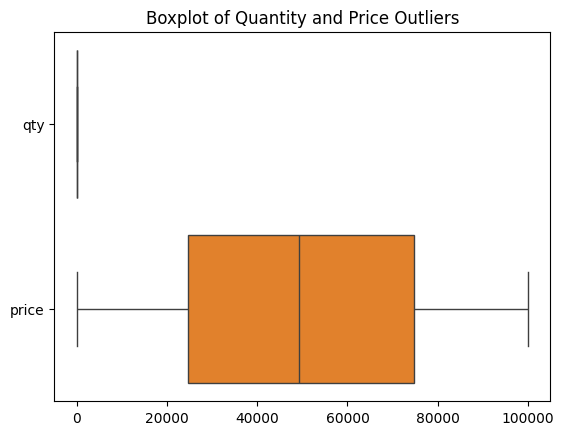

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Anomaly Detection for Numerical Data in the transaction table
def detect_numerical_outliers(df, column_name):
    if column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return pd.DataFrame()  # Return an empty DataFrame if the column doesn't exist

# Detect outliers in 'qty' and 'price'
outliers_qty = detect_numerical_outliers(transaction_df, 'qty')
outliers_price = detect_numerical_outliers(transaction_df, 'price')

# Anomaly Detection for Categorical Data
def detect_categorical_anomalies(df, column_name):
    if column_name in df.columns:
        column_counts = df[column_name].value_counts()
        rare_values = column_counts[column_counts == 1].index.tolist()
        return df[df[column_name].isin(rare_values)]
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return pd.DataFrame()  # Return an empty DataFrame if the column doesn't exist

# Detect anomalies in customer data
outliers_country = detect_categorical_anomalies(customer_df, 'country')
outliers_city = detect_categorical_anomalies(customer_df, 'city')

# Detect anomalies in transaction data
outliers_product_category = detect_categorical_anomalies(transaction_df, 'product_category')
outliers_payment_type = detect_categorical_anomalies(transaction_df, 'payment_type')

# Display results
print("Outliers in Quantity:\n", outliers_qty)
print("Outliers in Price:\n", outliers_price)
print("Outliers in Country:\n", outliers_country)
print("Outliers in City:\n", outliers_city)
print("Outliers in Product Category:\n", outliers_product_category)
print("Outliers in Payment Type:\n", outliers_payment_type)

# Visualize outliers
sns.boxplot(data=transaction_df[['qty', 'price']], orient='h')
plt.title('Boxplot of Quantity and Price Outliers')
plt.show()


## Connecting Python and SQL

In [ ]:
!pip uninstall mysql

In [ ]:
# !pip install mysql-connector-python

In [2]:
import mysql.connector
import json

In [25]:
def SQL_Connection():
    return mysql.connector.connect(host="localhost",user="root",password="Bhavana@5",database="project_0",auth_plugin='mysql_native_password')

In [55]:
def load_data():
 with open(r'C:\Users\yogi\Downloads\DataSets\customers.json', 'r') as json_file1:
     customers = json.load(json_file1)

 with open(r'C:\Users\yogi\Downloads\DataSets\transaction_logs.json', 'r') as json_file2:
     transactions = json.load(json_file2)

 return customers, transactions

# load_data()

## Creating customers and transactions table

In [95]:
def create_tables(cursor):
 # # Temporarily disable foreign key checks
 # cursor.execute("SET FOREIGN_KEY_CHECKS = 0;")

 # # Drop existing tables if they exist
 # cursor.execute("DROP TABLE IF EXISTS Transactions;")
 # cursor.execute("DROP TABLE IF EXISTS Customers;")

 # # Re-enable foreign key checks
 # cursor.execute("SET FOREIGN_KEY_CHECKS = 1;")

 # Create Customers Table
 cursor.execute("""
 CREATE TABLE IF NOT EXISTS Customers (
 customer_id INT PRIMARY KEY,
 customer_name VARCHAR(100) NOT NULL,
 country VARCHAR(100),
 city VARCHAR(50)
 ) ENGINE=InnoDB;
 """)

# Create Transactions Table
 cursor.execute("""
 CREATE TABLE IF NOT EXISTS Transactions (
 order_id INT PRIMARY KEY,
 customer_id INT,
 product_id INT,
 product_name VARCHAR(100),
 product_category VARCHAR(50),
 payment_type VARCHAR(20),
 qty INT,
 price DECIMAL(10, 2),
 datetime TEXT,
 ecommerce_website_name VARCHAR(100),
 payment_txn_id VARCHAR(50),
 payment_txn_success CHAR(1),
 failure_reason VARCHAR(100),
 FOREIGN KEY (customer_id) REFERENCES Customers(customer_id)
 ) ENGINE=InnoDB;
 """)



## Inserting data into the customers and transactions table

In [96]:
def insert_data(cursor, customers, transactions):
 # Insert Customers
 for customer in customers:
     try:
         cursor.execute(
     "INSERT INTO Customers (customer_id, customer_name, country, city) VALUES (%s, %s, %s, %s)",
     (customer['customer_id'], customer['customer_name'], customer['country'], customer['city'])
     )
     except mysql.connector.Error as err:
         print(f"Customer Insert Error: {err}")

# Insert Transactions
 for transaction in transactions:
     try:
         cursor.execute("INSERT INTO Transactions (order_id, customer_id, product_id, product_name, product_category,payment_type, qty, price, datetime, ecommerce_website_name, payment_txn_id, payment_txn_success,failure_reason) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
         (
         transaction['order_id'], transaction['customer_id'], transaction['product_id'],
         transaction['product_name'], transaction['product_category'], transaction['payment_type'],
         transaction['qty'], transaction['price'], transaction['datetime'],
         transaction['ecommerce_website_name'], transaction['payment_txn_id'],
         transaction['payment_txn_success'], transaction['failure_reason']
         )
     )
     except mysql.connector.Error as err:
         print(f"Transaction Insert Error: {err}")

## Displaying data in the table

In [134]:
def display_table(cursor, table_name):
    cursor.execute(f"SELECT * FROM {table_name};")
    results = cursor.fetchall()
    print(f"\n{table_name} Table:")
    i = 0
    for row in results:
         i +=1
         print(row)
         if i == 20:
             break
             

## final class with all the operations

In [130]:


def main():
    customers, transactions = load_data()
    try:
        MYDB = SQL_Connection()
        print(MYDB)
        cursor = MYDB.cursor()
        # Ensure tables are created first
        create_tables(cursor)
        # Insert data into tables
        insert_data(cursor, customers, transactions)
        MYDB.commit()
        print("Data inserted successfully!")
        # Display the Customers and Transactions tables
        display_table(cursor, "Customers")
        display_table(cursor, "Transactions")
    except mysql.connector.Error as err:
        print(f"Database Error: {err}")
    finally:
        cursor.close()
        MYDB.close()

main()

Data inserted successfully!

Customers Table:
(102, 'Kenneth Singh', 'Sweden', 'Davidhaven')
(106, 'Mr. James Mendez', 'British Indian Ocean Territory (Chagos Archipelago)', 'Paulmouth')
(109, 'Joseph Martin', 'Somalia', 'Port Vickiemouth')
(135, 'Joann Romero', 'Timor-Leste', 'Port Raymondmouth')
(144, 'Robert Reeves', 'Wallis and Futuna', 'Lake Jason')
(145, 'Jasmine Dean', 'Tuvalu', 'Scotthaven')
(147, 'Charles Becker', 'Isle of Man', 'East Cindyfurt')
(158, 'Anthony Bowman', 'Latvia', 'Carriebury')
(159, 'Desiree Edwards', 'Central African Republic', 'North Williammouth')
(161, 'Kyle Lee', 'Greece', 'Jamesberg')

Transactions Table:
(1, 1731, 8609, 'Central home & kitche', 'Home & Kitchen', 'Wallet', 25, Decimal('64216.00'), '2021-07-26T20:16:14', 'www.bestbuy.com', 'a395e8c7', 'N', 'Card Expired')
(2, 5539, 2409, 'Upon sport', 'Sports', 'Card', 34, Decimal('69877.00'), '2021-08-25T03:41:32', 'www.flipkart.com', 'b40791f8', 'N', 'Invalid CVV')
(3, 3507, 1145, 'Across stationer', 'S

## Normalization of customers and transactions table

In [133]:
import mysql.connector
import json

def SQL_connection():
    return mysql.connector.connect(host="localhost",user="root",password="Bhavana@5",database="project_0")

def load_data():
    with open(r'C:\Users\yogi\Downloads\DataSets\customers.json', 'r') as json_file1:
        customers = json.load(json_file1)
        
    with open(r'C:\Users\yogi\Downloads\DataSets\transaction_logs.json', 'r') as json_file2:
        transactions = json.load(json_file2)
    return customers, transactions

def create_normalized_tables(cursor):
    # Creating customers table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS customers (
            customer_id INT PRIMARY KEY,
            customer_name VARCHAR(255),
            country VARCHAR(100),
            city VARCHAR(100)
        );
    """)

    # Creating product_details table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS product_details (
            product_id INT PRIMARY KEY AUTO_INCREMENT,
            product_name VARCHAR(200),
            product_category VARCHAR(200),
            qty INT,
            price DECIMAL(10, 2)
        );
    """)

    # Creating order_details table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS order_details (
        order_id INT PRIMARY KEY,
        customer_id INT,
        product_id INT,
        order_timedate DATETIME,
        FOREIGN KEY(customer_id) REFERENCES customers(customer_id),
        FOREIGN KEY(product_id) REFERENCES product_details(product_id)
    );
    """)

    # Creating payment_details table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS payment_details (
        payment_id INT PRIMARY KEY AUTO_INCREMENT,
        payment_type VARCHAR(200),
        order_id INT,
        FOREIGN KEY(order_id) REFERENCES order_details(order_id)
    );
    """)

    # Creating transaction_status table
    cursor.execute(""" 
    CREATE TABLE IF NOT EXISTS transaction_status (
        payment_txn_id INT PRIMARY KEY,
        payment_txn_success VARCHAR(200),
        failure_reason VARCHAR(200),
        payment_id INT,
        FOREIGN KEY(payment_id) REFERENCES payment_details(payment_id)
    );
    """)

    # Creating ecommerce_websites table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS ecommerce_websites (
        website_id INT PRIMARY KEY AUTO_INCREMENT,
        website_name VARCHAR(255) UNIQUE
    );
    """)

def insert_data_normalized(cursor, customers, transactions, mydb):
    # Insert customers data
    for customer in customers:
        cursor.execute("""
            INSERT IGNORE INTO customers (customer_id, customer_name, country, city)
            VALUES (%s, %s, %s, %s)
        """, (
            customer['customer_id'],
            customer['customer_name'],
            customer['country'],
            customer['city']
        ))

    # Insert product details, order details, payment details, and transaction data
    for log in transactions:
        # Insert into product_details
        cursor.execute("""
            INSERT IGNORE INTO product_details (product_name, product_category, qty, price)
            VALUES (%s, %s, %s, %s)
        """, (
            log['product_name'],
            log['product_category'],
            log['qty'],
            log['price']
        ))
        product_id = cursor.lastrowid
        
        # Insert into order_details
        cursor.execute("""
            INSERT IGNORE INTO order_details (order_id, customer_id, product_id, order_timedate)
            VALUES (%s, %s, %s, %s)
        """, (
            log['order_id'],
            log['customer_id'],
            product_id,
            log['datetime']
        ))

        # Insert into payment_details
        cursor.execute("""
            INSERT IGNORE INTO payment_details (payment_type, order_id)
            VALUES (%s, %s)
        """, (
            log['payment_type'],
            log['order_id']
        ))
        payment_id = cursor.lastrowid

        # Insert into transaction_status
        cursor.execute("""
            INSERT IGNORE INTO transaction_status (payment_txn_id, payment_txn_success, failure_reason, payment_id)
            VALUES (%s, %s, %s, %s)
        """, (
            log['payment_txn_id'],
            log['payment_txn_success'],
            log['failure_reason'],
            payment_id
        ))

        # Insert into ecommerce_websites
        cursor.execute("""
            INSERT IGNORE INTO ecommerce_websites (website_name)
            VALUES (%s)
        """, (
            log['ecommerce_website_name'],
        ))

    mydb.commit()  # Commit after all inserts

def display_table(cursor, table_name):
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 10")
    results = cursor.fetchall()
    print(f"\n{table_name} Table:")
    for row in results:
        print(row)

def main():
    customers, transactions = load_data()
    try:
        MYDB = SQL_connection()
        cursor = MYDB.cursor()
        
        # Ensure tables are created first
        create_normalized_tables(cursor)
        
        # Insert data into tables
        insert_data_normalized(cursor, customers, transactions, MYDB)
        
        print("Data inserted successfully!")
        
        # Display the tables
        display_table(cursor, "customers")
        display_table(cursor, "product_details")
        display_table(cursor, "order_details")
        display_table(cursor, "payment_details")
        display_table(cursor, "transaction_status")
        display_table(cursor, "ecommerce_websites")
        
    except mysql.connector.Error as err:
        print(f"Database Error: {err}")
    finally:
        cursor.close()
        MYDB.close()

if __name__ == "__main__":
    main()


Data inserted successfully!

customers Table:
(102, 'Kenneth Singh', 'Sweden', 'Davidhaven')
(106, 'Mr. James Mendez', 'British Indian Ocean Territory (Chagos Archipelago)', 'Paulmouth')
(109, 'Joseph Martin', 'Somalia', 'Port Vickiemouth')
(135, 'Joann Romero', 'Timor-Leste', 'Port Raymondmouth')
(144, 'Robert Reeves', 'Wallis and Futuna', 'Lake Jason')
(145, 'Jasmine Dean', 'Tuvalu', 'Scotthaven')
(147, 'Charles Becker', 'Isle of Man', 'East Cindyfurt')
(158, 'Anthony Bowman', 'Latvia', 'Carriebury')
(159, 'Desiree Edwards', 'Central African Republic', 'North Williammouth')
(161, 'Kyle Lee', 'Greece', 'Jamesberg')

product_details Table:
(1, 'Central home & kitche', 'Home & Kitchen', 25, 64216)
(2, 'Upon sport', 'Sports', 34, 69877)
(3, 'Across stationer', 'Stationery', 28, 35491)
(4, 'Start home & kitche', 'Home & Kitchen', 33, 39540)
(5, 'Draw beaut', 'Beauty', 27, 80635)
(6, 'Growth beaut', 'Beauty', 44, 62844)
(7, 'Lose furnitur', 'Furniture', 28, 21742)
(8, 'Vote grocerie', 'Gro